# Tải các thư viện

In [85]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [86]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

# Set GPU

In [87]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Folder path

In [88]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

# Thu dữ liệu vào folder Positive và anchor

In [89]:
import uuid

In [90]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\415c7774-8dbe-11ef-b14f-8860cdaba2ae.jpg'

In [91]:
# Thiết lập kết nối với webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cắt khung hình thành kích thước 250x250px
    frame = frame[120:120+250, 200:200+250, :]
    
    # Thu thập hình ảnh anchor 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Tạo đường dẫn tệp tin duy nhất 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Ghi hình ảnh anchor ra tệp
        cv2.imwrite(imgname, frame)
    
    # Thu thập hình ảnh positive
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Tạo đường dẫn tệp tin duy nhất 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Ghi hình ảnh positive ra tệp
        cv2.imwrite(imgname, frame)
    
    # Hiện hình ảnh lên màn hình
    cv2.imshow('Image Collection', frame)
    
    # Thoát chương trình một cách an toàn
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Giải phóng webcam
cap.release()
# Đóng khung hình hiển thị hình ảnh
cv2.destroyAllWindows()


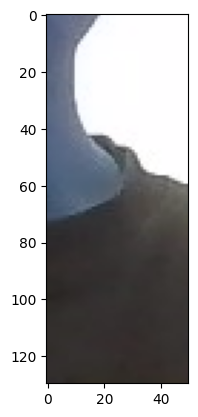

In [92]:
plt.imshow(frame[120:120+250,200:200+250, :])

# Tạo biến chứa ảnh

In [93]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(3000)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(3000)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(3000)

In [94]:
dir_test = anchor.as_numpy_iterator()

In [95]:
print(dir_test.next())

b'data\\anchor\\5febaafdd4666d383477.jpg'


# Chỉnh lại size ảnh

In [96]:
def preprocess(file_path):
    # Đọc hình ảnh từ đường dẫn tệp
    byte_img = tf.io.read_file(file_path)
    # Giải mã hình ảnh từ dạng JPEG
    img = tf.io.decode_jpeg(byte_img)
    
    # Các bước tiền xử lý - thay đổi kích thước hình ảnh về 100x100x3
    img = tf.image.resize(img, (100, 100))
    # Chuẩn hóa hình ảnh để giá trị nằm trong khoảng từ 0 đến 1
    img = img / 255.0

    # Trả về hình ảnh đã được xử lý
    return img


In [97]:
img = preprocess('data\\anchor\\p2.jpg')

In [98]:
img.numpy().max() 

0.9669022

# Tạo Dataset

In [99]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [100]:
samples = data.as_numpy_iterator()

In [101]:
exampple = samples.next()

In [102]:
exampple

(b'data\\anchor\\p1.jpg', b'data\\positive\\ffb0c9a3cc3d75632c2c.jpg', 1.0)

In [103]:
import pandas as pd
import tensorflow as tf

image_pairs = []
labels = []

# Duyệt qua các phần tử trong tập dữ liệu và thêm vào danh sách
for anchor_img, positive_or_negative_img, label in data:
    # Giả sử chúng ta chuyển đổi các tensor hình ảnh thành numpy array
    anchor_img = anchor_img.numpy()  # Chuyển đổi tensor thành numpy array
    positive_or_negative_img = positive_or_negative_img.numpy()  # Chuyển đổi tensor thành numpy array
    
    image_pairs.append((anchor_img, positive_or_negative_img))
    labels.append(label.numpy())

# Tạo DataFrame từ các danh sách
df = pd.DataFrame(image_pairs, columns=['Anchor', 'Image'])
df['Label'] = labels

# Hiển thị DataFrame
display(df)

,Anchor,Image,Label
0,b'data\\anchor\\c1842b7e56e5efbbb6f4.jpg',b'data\\positive\\58529c7999e720b979f6.jpg',1.0
1,b'data\\anchor\\e702d4e7a97c1022496d.jpg',b'data\\positive\\3d1b650e6090d9ce8081.jpg',1.0
2,b'data\\anchor\\p3.jpg',b'data\\positive\\ad0da615a38b1ad5439a.jpg',1.0
3,b'data\\anchor\\c217c1f7bc6c05325c7d.jpg',b'data\\positive\\c217c1f7bc6c05325c7d.jpg',1.0
4,b'data\\anchor\\p1.jpg',b'data\\positive\\b412f8dbfc45451b1c54.jpg',1.0
5,b'data\\anchor\\23f9c700ba9b03c55a8a.jpg',b'data\\positive\\ffb0c9a3cc3d75632c2c.jpg',1.0
6,b'data\\anchor\\5febaafdd4666d383477.jpg',b'data\\positive\\43e067c66258db068249.jpg',1.0
7,b'data\\anchor\\p2.jpg',b'data\\positive\\1128d6abab30126e4b21.jpg',1.0
8,b'data\\anchor\\62532db7502ce972b03d.jpg',b'data\\positive\\23f9c700ba9b03c55a8a.jpg',1.0
9,b'data\\anchor\\1128d6abab30126e4b21.jpg',b'data\\positive\\b972876182ff3ba162ee.jpg',1.0


# Xây dựng phân chia giữa tập huấn luyện và tập kiểm tra

In [104]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [105]:
res = preprocess_twin(*exampple)

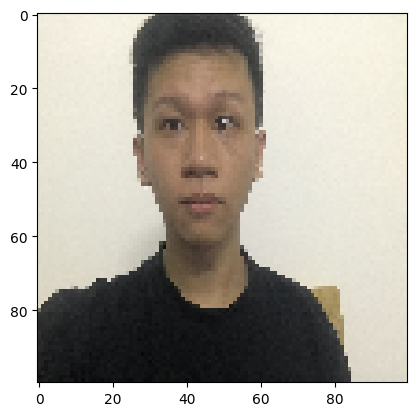

In [106]:
plt.imshow(res[1])

In [107]:
res[2]

1.0

In [108]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [109]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [110]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Tạo lớp embedding

In [111]:
inp = Input(shape=(100,100,3), name='input_image')

In [112]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [113]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [114]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [115]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [116]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [117]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [118]:
mod.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [119]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def make_embedding(): 
    inp = Input(shape=(100, 100, 3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10, 10), activation='relu')(inp)
    m1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7, 7), activation='relu')(m1)
    m2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4, 4), activation='relu')(m2)
    m3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4, 4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    return Model(inputs=inp, outputs=d1, name='embedding')


In [120]:
embedding = make_embedding()

In [121]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [122]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [123]:
l1 = L1Dist()

# Tạo Module (siamese)

In [124]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [125]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [126]:
siamese_layer = L1Dist()

In [127]:
distances = siamese_layer(inp_embedding, val_embedding)

In [128]:
classifier = Dense(1, activation='sigmoid')(distances)

In [129]:
classifier

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_74>

In [130]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [131]:
siamese_network.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_5 (L1Dist)  │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
def make_siamese_model(): 
    
    input_image = Input(name='input_img', shape=(100,100,3))
    
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [133]:
siamese_model = make_siamese_model()

In [134]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_6 (L1Dist)  │ (None, 4096)      │          0 │ embedding[2][0],  │
│                     │                   │            │ embedding[3][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [135]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [136]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [137]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [138]:
test_batch = train_data.as_numpy_iterator()

In [139]:
batch_1 = test_batch.next()

In [140]:
X = batch_1[:2]

In [141]:
y = batch_1[2]

In [142]:
y

array([0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
      dtype=float32)

In [143]:
tf.losses.BinaryCrossentropy??

Init signature:
tf.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='binary_crossentropy',
    dtype=None,
)
Source:        
@keras_export("keras.losses.BinaryCrossentropy")
class BinaryCrossentropy(LossFunctionWrapper):
    """Computes the cross-entropy loss between true labels and predicted labels.

    Use this cross-entropy loss for binary (0 or 1) classification applications.
    The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single
        floating-point value which either represents a
        [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf]
        when `from_logits=True`) or a probability (i.e, value in [0., 1.] when
        `from_logits=False`).

    Args:
        from_logits: Whether to interpret `y_pred` as a tensor of
            [logit](htt

In [144]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [145]:
from tensorflow.keras.metrics import Precision, Recall

In [146]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [147]:
EPOCHS = 50

In [171]:
train(train_data, EPOCHS)


 Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
0.000119265904 1.0 1.0

 Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0.00014032252 1.0 1.0

 Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
7.0573085e-05 1.0 1.0

 Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0.00014496087 1.0 1.0

 Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
7.9721474e-05 1.0 1.0

 Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0.000107922475 1.0 1.0

 Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
6.789419e-05 1.0 1.0

 Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0.00011263715 1.0 1.0

 Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
2.0606112e-05 1.0 1.0

 Epoch 1

In [172]:
from tensorflow.keras.metrics import Precision, Recall

In [173]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [174]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


In [175]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 0, 1, 1, 0]

In [176]:
y_true

array([1., 1., 0., 1., 1., 0.], dtype=float32)

In [177]:
# Tạo một đối tượng metric Recall
m = Recall()

# Tính toán giá trị recall
m.update_state(y_true, y_hat)

# Trả về kết quả Recall
m.result().numpy()

1.0

In [178]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1.0 1.0


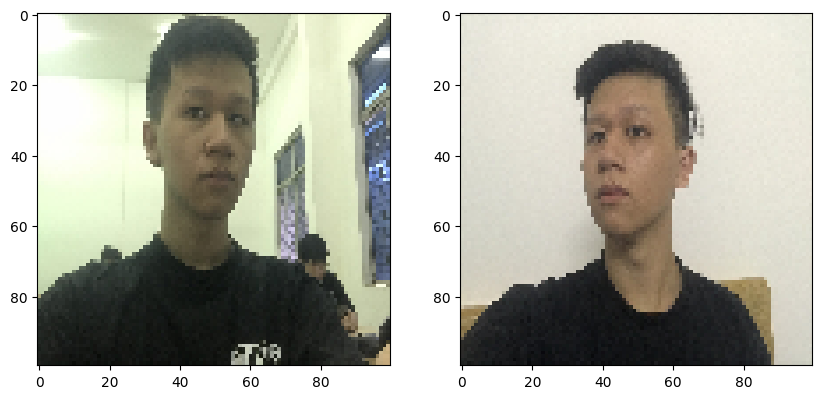

In [179]:
# Đặt kích thước biểu đồ 
plt.figure(figsize=(10,8))

# Đặt biểu đồ con đầu tiên
plt.subplot(1, 2, 1)
plt.imshow(test_input[0])

# Đặt biểu đồ con thứ hai
plt.subplot(1, 2, 2)
plt.imshow(test_val[0])

# Hiển thị biểu đồ
plt.show()


In [180]:
siamese_model.save('siamesemodelv2.h5')

In [181]:
L1Dist

__main__.L1Dist

In [182]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [183]:
# Dự đoán bằng model
siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


array([[9.9994707e-01],
       [3.9613955e-08],
       [9.9987864e-01],
       [6.0401841e-13],
       [9.9999875e-01],
       [9.9998277e-01]], dtype=float32)

In [184]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_8 (L1Dist)  │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_8[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [185]:
os.listdir(os.path.join('application_data', 'verification_images'))

['e42dd587-7cda-11ef-add4-ed8ab2114843.jpg']

In [186]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [187]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\e42dd587-7cda-11ef-add4-ed8ab2114843.jpg


In [189]:
def verify(model, detection_threshold, verification_threshold):
    # Tạo mảng kết quả
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Dự đoán
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Ngưỡng phát hiện: Chỉ số trên đó một dự đoán được coi là dương
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Ngưỡng xác minh: Tỷ lệ dự đoán dương / tổng số mẫu dương
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified


In [192]:
cap = cv2.VideoCapture(0)  # Mở kết nối đến webcam
while cap.isOpened():  # Khi webcam mở
    ret, frame = cap.read()  # Đọc khung hình từ webcam
    frame = frame[120:120+250, 200:200+250, :]  # Cắt khung hình thành kích thước 250x250px
    
    cv2.imshow('Verification', frame)  # Hiển thị khung hình trong cửa sổ 'Verification'
    
    # Kích hoạt xác minh
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Lưu hình ảnh đầu vào vào thư mục application_data/input_image
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Thực hiện xác minh
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)  # In kết quả xác minh
    
    if cv2.waitKey(10) & 0xFF == ord('q'):  # Nếu nhấn 'q', thoát khỏi vòng lặp
        break

cap.release()  # Giải phóng webcam
cv2.destroyAllWindows()  # Đóng tất cả cửa sổ


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
True


In [193]:
np.sum(np.squeeze(results) > 0.9)

1

In [194]:
results

[array([[0.9990942]], dtype=float32)]